pip install metpy

conda install -c conda-forge metpy

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib import cm
import metpy.calc as mpcalc

%matplotlib inline

In [5]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url)
#ds = xr.open_dataset(r"C:\Users\ioloi\Downloads/ERSST_V5_mon_185401-202106.nc")
# select period
ds = ds.sel(time=slice('1990', '2020'))

#actually load the data
ds.load()

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 372, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2020-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2023-04-04
    DODS_EXTRA.Unlimited_Dimension:  time

In [6]:
# select time and domain
ds_EP = ds.sel(lat=slice(50, -50), lon=slice(190, 240))
ds_EP_mean = ds_EP.mean(dim=('lon'))
ds_EP_mean


<xarray.Dataset>
Dimensions:    (lat: 51, time: 372, nbnds: 2)
Coordinates:
  * lat        (lat) float32 50.0 48.0 46.0 44.0 ... -44.0 -46.0 -48.0 -50.0
  * time       (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2020-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time, lat) float32 6.677 7.541 8.676 10.0 ... 11.51 10.52 9.619

In [9]:
# select time
vtimes = ds_EP_mean.time.values.astype('datetime64[ms]').astype('O')

# select latitude
lats = ds_EP_mean.lat.values

Text(1.0, 1.0, 'Time Range: 19900101 00Z - 20201201 00Z')

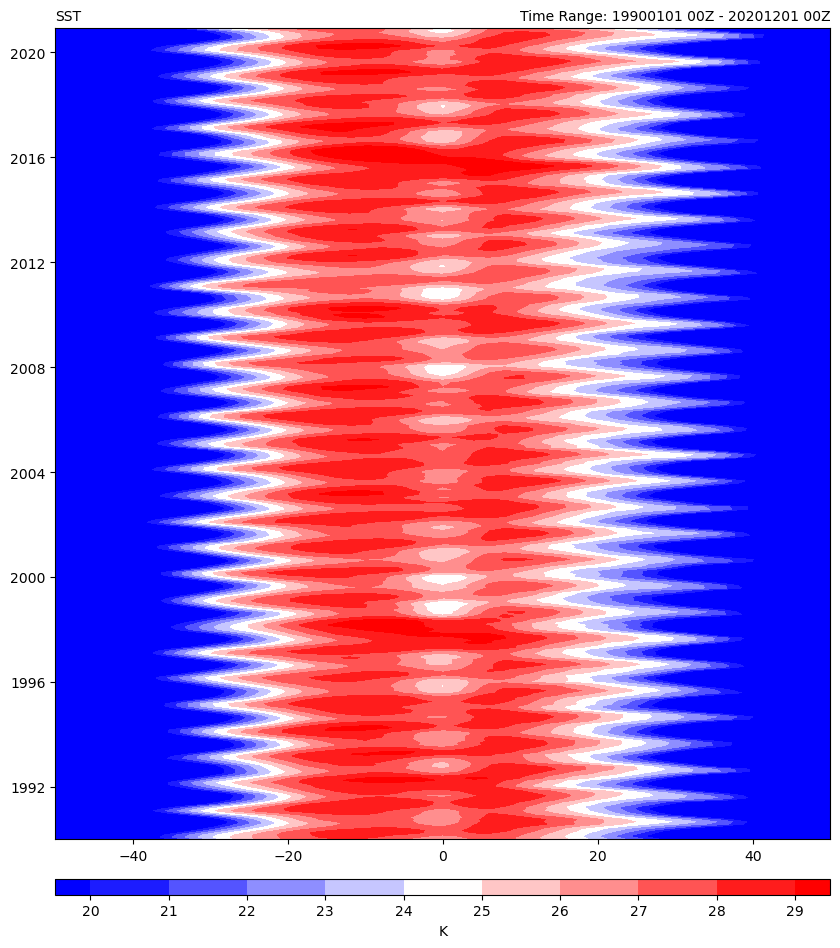

In [10]:
fig = plt.figure(figsize=(10, 13))

ax = fig.add_subplot(111)
#ax.invert_yaxis()  # invert time

clevs = np.arange(20, 30, 1)

#smoothed
#cf = ax.contourf(lats, vtimes, mpcalc.smooth_n_point(ds_EP_mean['sst'], 9, 2), clevs, cmap=plt.cm.bwr, extend='both')

#not smoothed
cf = ax.contourf(lats, vtimes, ds_EP_mean['sst'], clevs, cmap=plt.cm.bwr, extend='both')
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)
cbar.set_label('K')
#ax.set_yticks(vtimes[4::8])
#ax.set_yticklabels(vtimes[4::8])

plt.title('SST', loc='left', fontsize=10)
plt.title('Time Range: {0:%Y%m%d %HZ} - {1:%Y%m%d %HZ}'.format(vtimes[0], vtimes[-1]),
          loc='right', fontsize=10)

In [11]:
ds1=ds_EP_mean.transpose()
ds1

<xarray.Dataset>
Dimensions:    (lat: 51, time: 372, nbnds: 2)
Coordinates:
  * lat        (lat) float32 50.0 48.0 46.0 44.0 ... -44.0 -46.0 -48.0 -50.0
  * time       (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2020-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (nbnds, time) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (lat, time) float32 6.677 5.569 5.605 6.266 ... 7.999 8.592 9.619

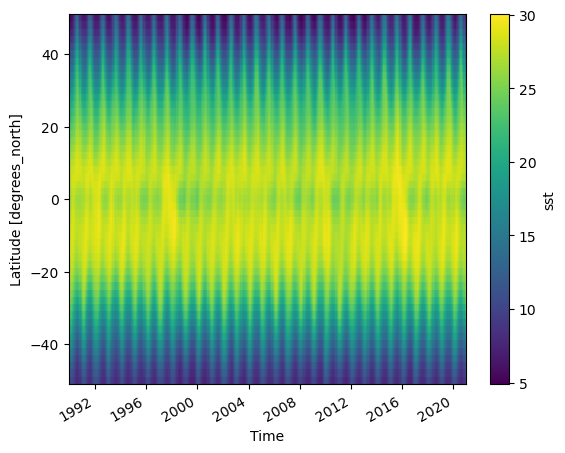

In [12]:
ds1['sst'].plot()

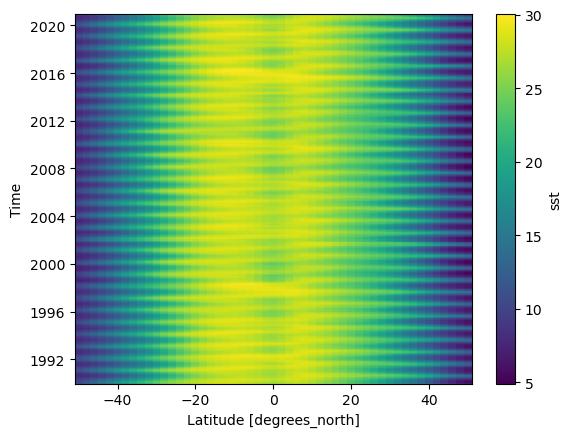

In [13]:
ds_EP_mean['sst'].plot()

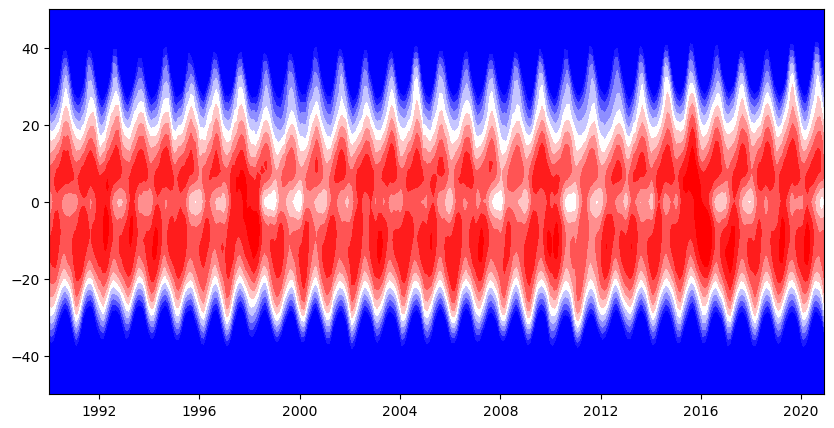

In [14]:
fig1 = plt.figure(figsize=(10, 5))

ax1 = fig1.add_subplot(111)
#ax.invert_yaxis()  # invert time

clevs = np.arange(20, 30, 1)

#smoothed
#cf = ax.contourf(lats, vtimes, mpcalc.smooth_n_point(ds_EP_mean['sst'], 9, 2), clevs, cmap=plt.cm.bwr, extend='both')

#not smoothed
cf1 = ax1.contourf(vtimes, lats, ds1['sst'], clevs, cmap=plt.cm.bwr, extend='both')
#cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)
#cbar.set_label('K')

#ax.set_yticks(vtimes[4::8])
#ax.set_yticklabels(vtimes[4::8])

#plt.title('SST', loc='left', fontsize=10)